In [ ]:
import numpy as np
from spec_id import Analyze_Stack_avgage,Likelihood_contours, Make_model_list,Stack_spec_normwmean,Stack_model_normwmean,\
    Best_fit_model,Norm_P_stack
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d, interp2d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [ ]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('lowmass_testlist.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

metal=np.array([ 0.0020, 0.0025, 0.0031, 0.0039, 0.0049, 0.0061,  0.0068,  0.0077,  0.0085,  0.0096,  0.0106,
                  0.012, 0.0132, 0.014,  0.0150,  0.0164, 0.018,  0.019,  0.021,  0.024, 0.027, 0.03])
bcmetal=np.array([0.0001, 0.0004, 0.004, 0.008, 0.02])
age=np.arange(.5,6.1,.1)
tau=[0,8.0,8.93,9.21,9.37,9.5,9.6,9.66,9.73,9.8,9.84,9.88,9.93,9.97,10.0]
ntau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

M,A=np.meshgrid(metal,age)
BM,BA=np.meshgrid(bcmetal,age)

In [ ]:
####### Read in file
dat = fits.open('chidat/lmass_mar8_nt_cont_fit_chidata.fits')
chi = []
for i in range(len(metal)):
    chi.append(dat[i + 1].data)
chi = np.transpose(chi)

scale = Readfile('tau_scale_ntau.dat', 1)

overhead = []
for i in range(len(scale)):
    amt = []
    for ii in range(len(age)):
        if age[ii] > scale[i][-1]:
            amt.append(1)
    overhead.append(sum(amt))

newchi = []
for i in range(len(chi)):
    if i == 0:
        iframe = chi[i]
    else:
        iframe = interp2d(metal, scale[i], chi[i])(metal, age[:-overhead[i]])
        iframe = np.append(iframe, np.repeat([np.repeat(1E8, len(metal))], overhead[i], axis=0), axis=0)
        # iframe = np.append(iframe, np.repeat([np.repeat(0, len(metal))], overhead[i], axis=0), axis=0)
    newchi.append(iframe)
prob = np.exp(-np.array(newchi)/2).astype(np.float128)

# prob = np.array(Norm_P_stack(np.array(tau), metal, age, newchi)).astype(np.float128)

79.3464844071


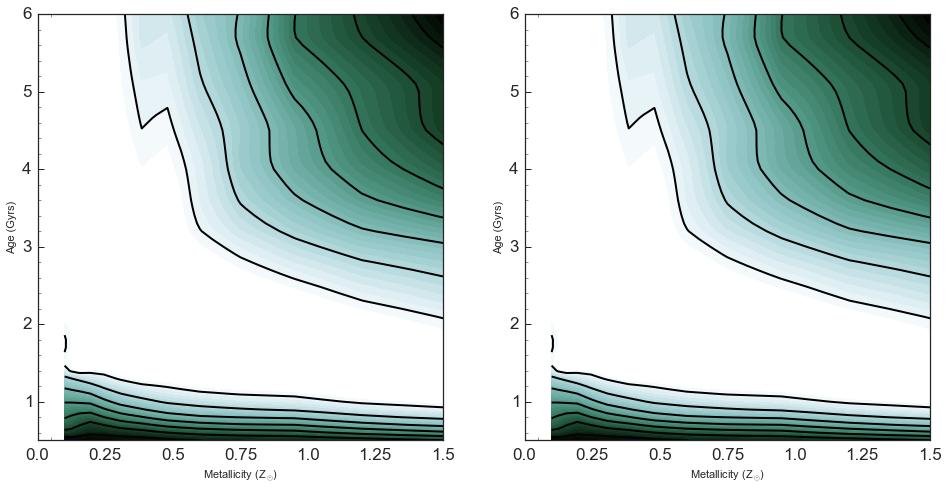

79.9726201012


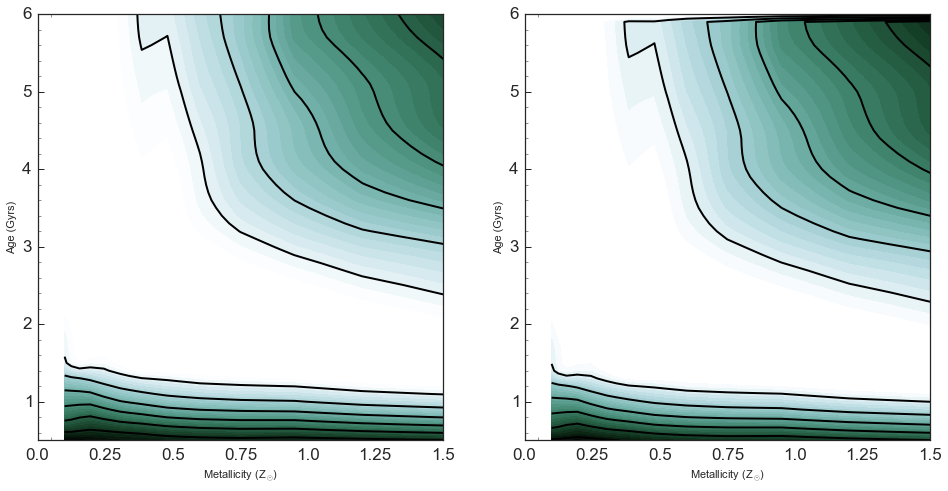

80.7615255996


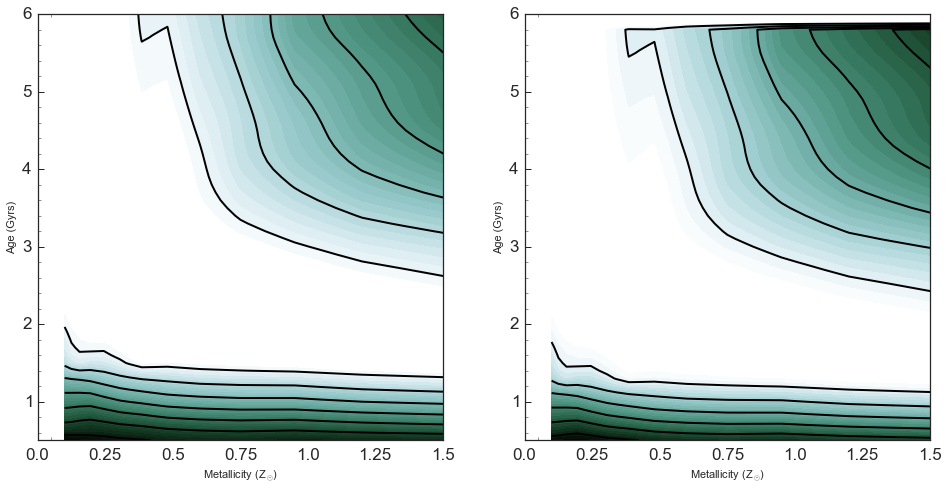

83.0132704848


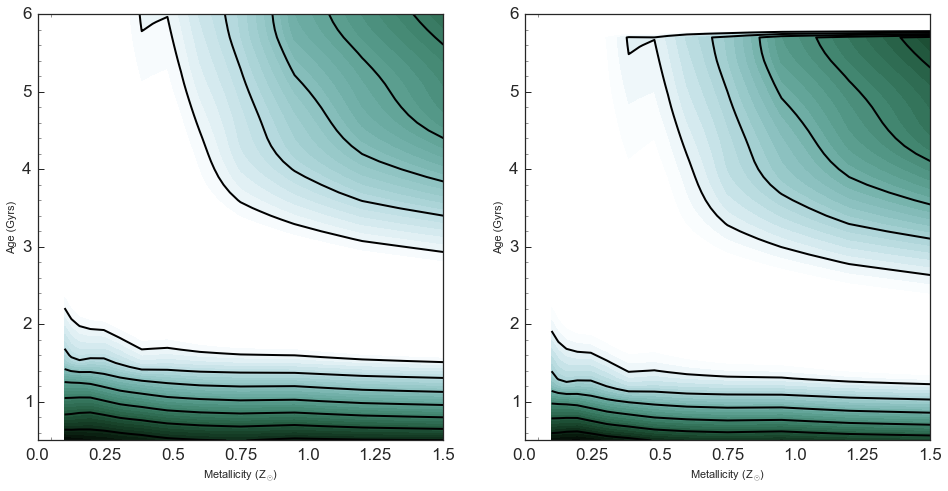

84.3336218647


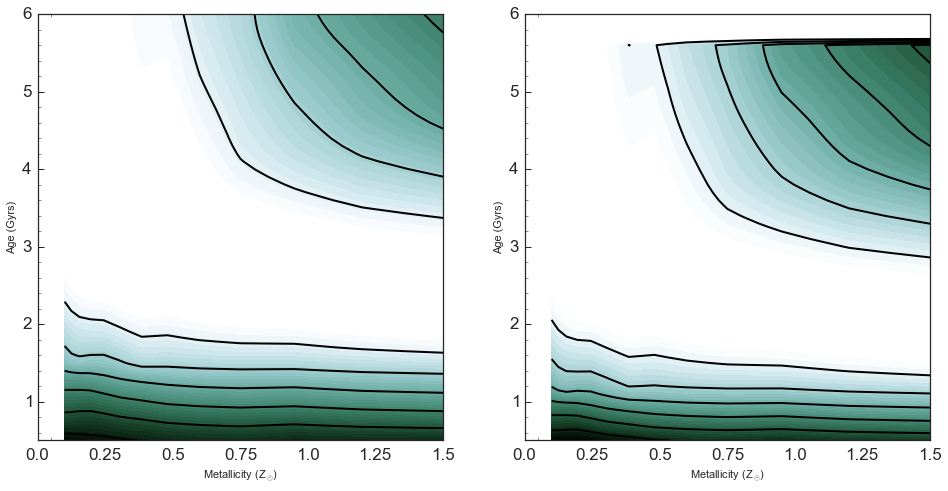

85.6202809587


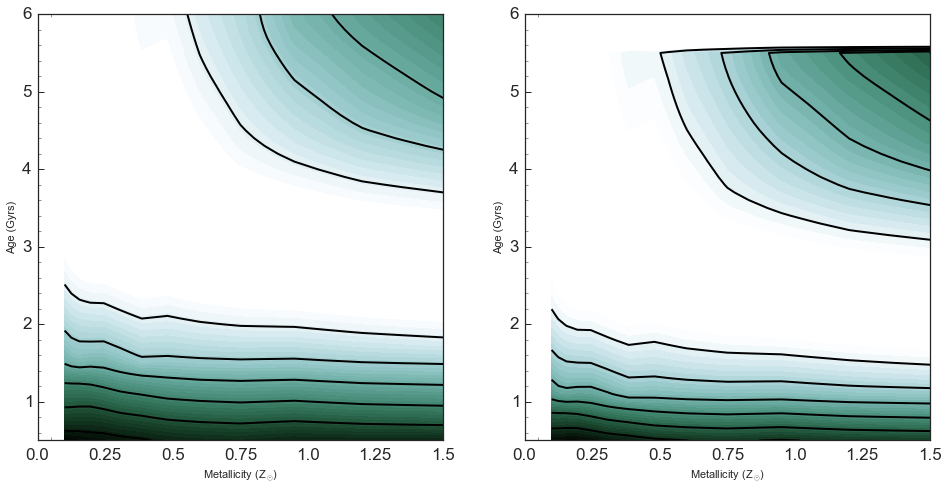

86.1847807327


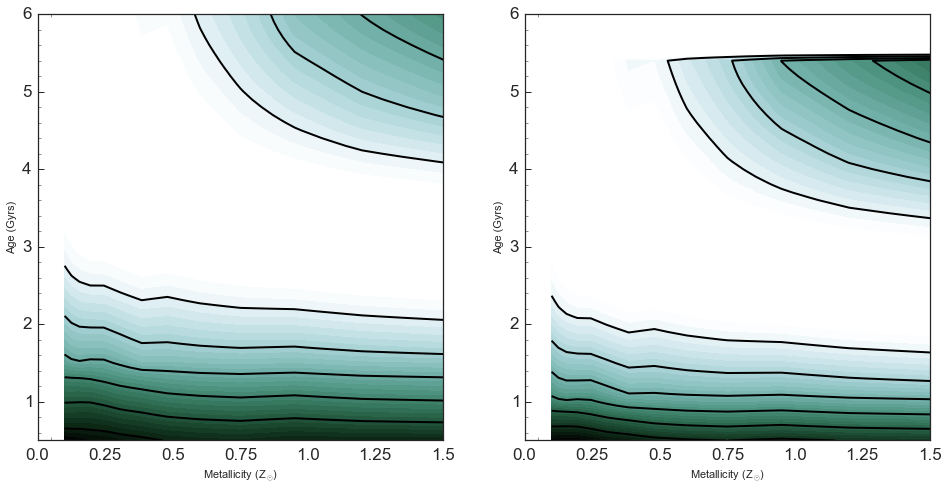

87.1213588415


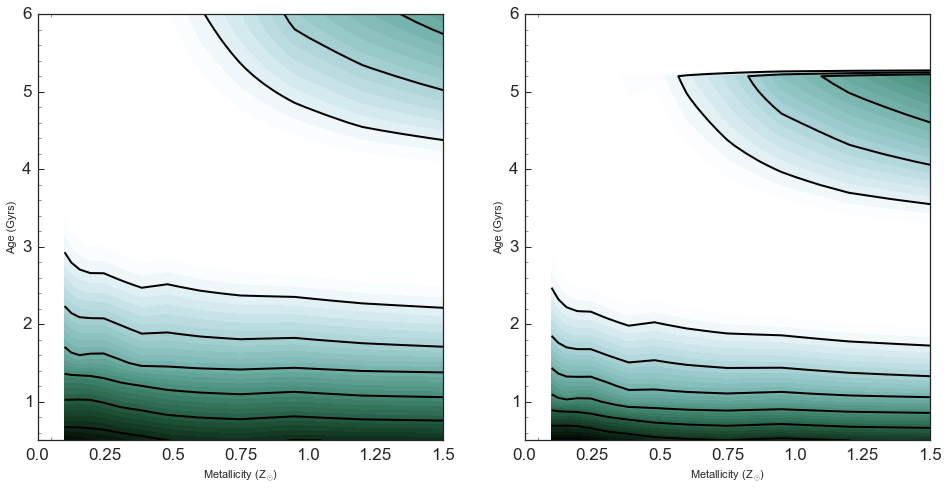

88.6409857102


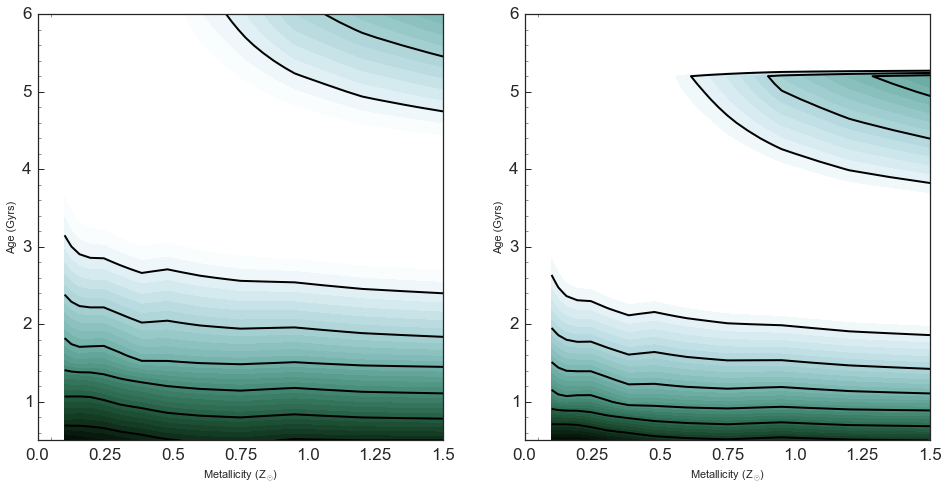

88.9774457552


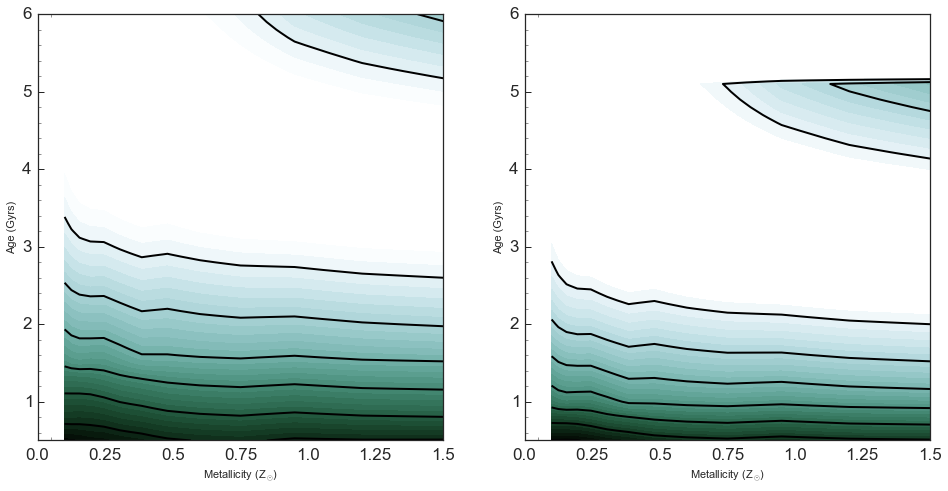

89.5503848909


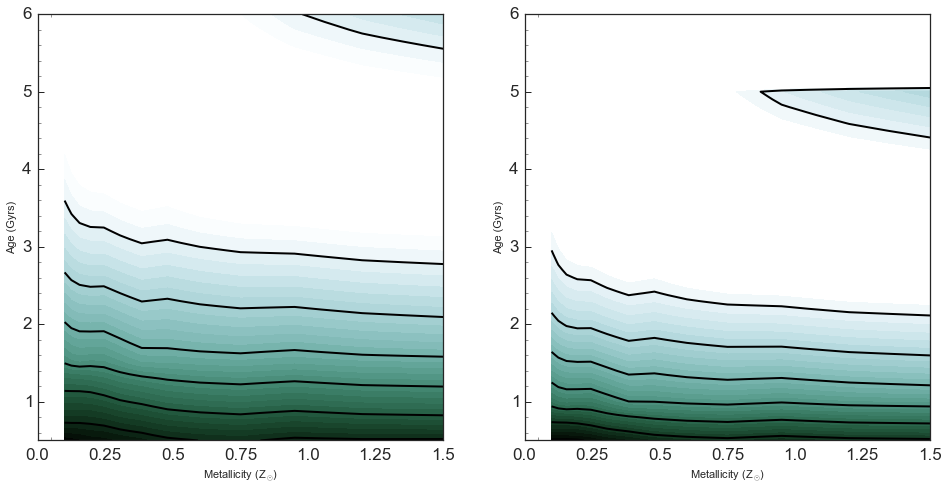

90.1790484615


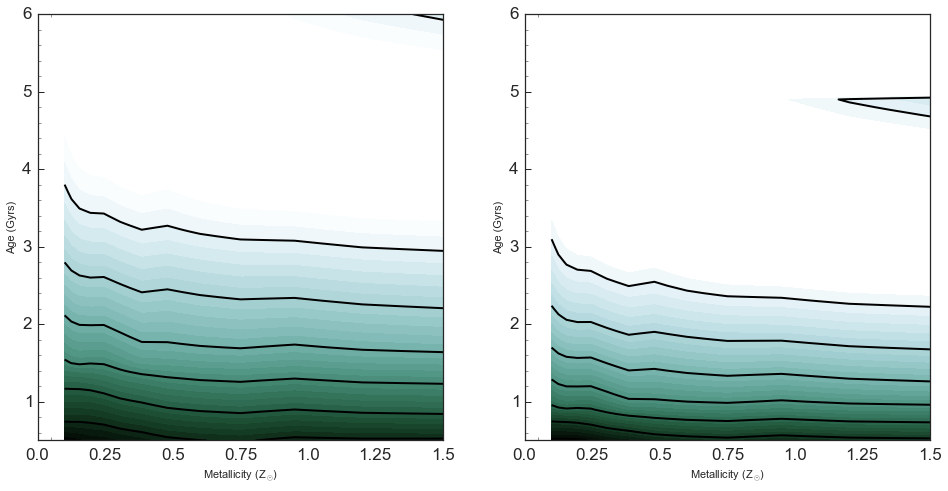

91.0653327915


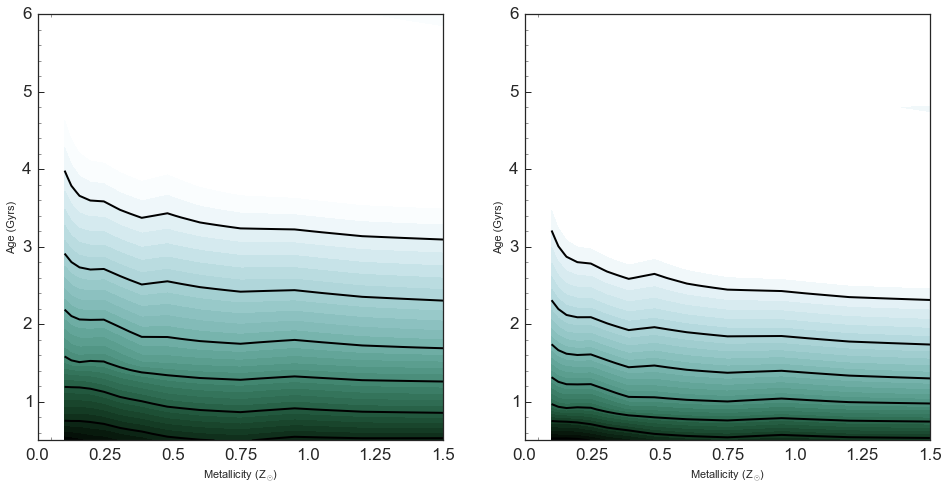

91.4505519949


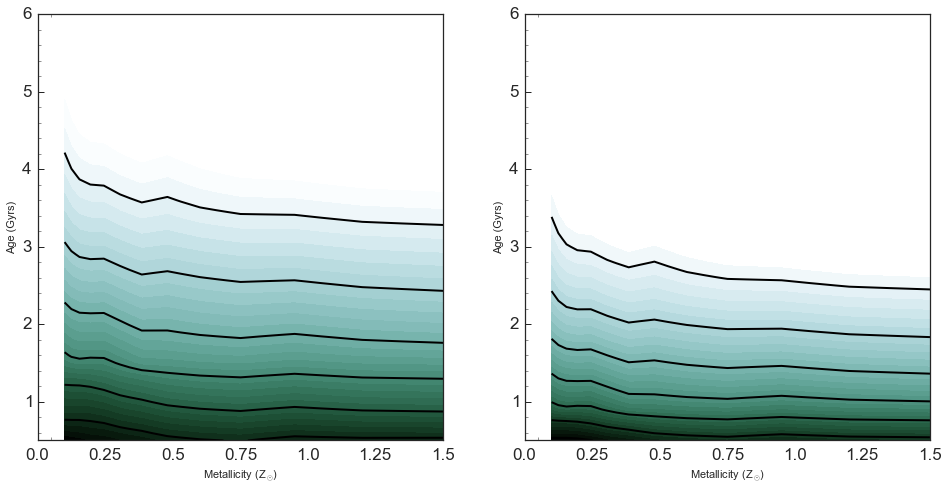

92.0114604272


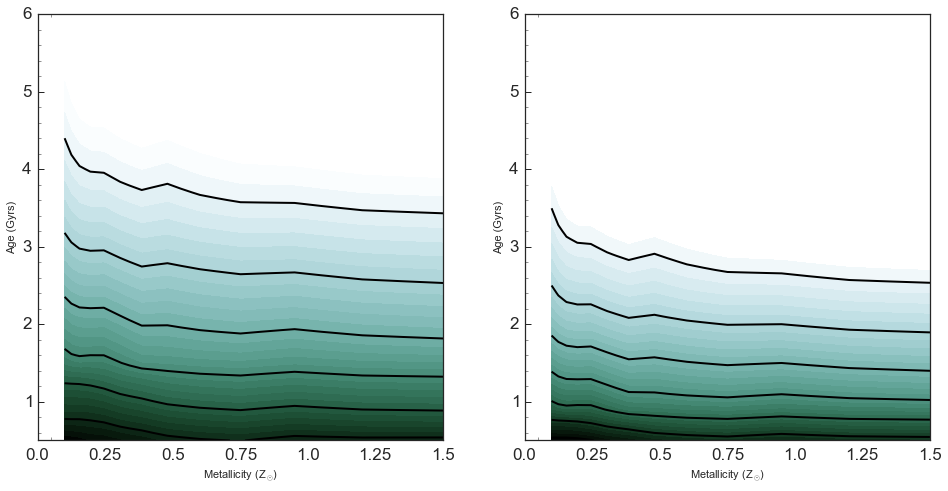

92.4010993845


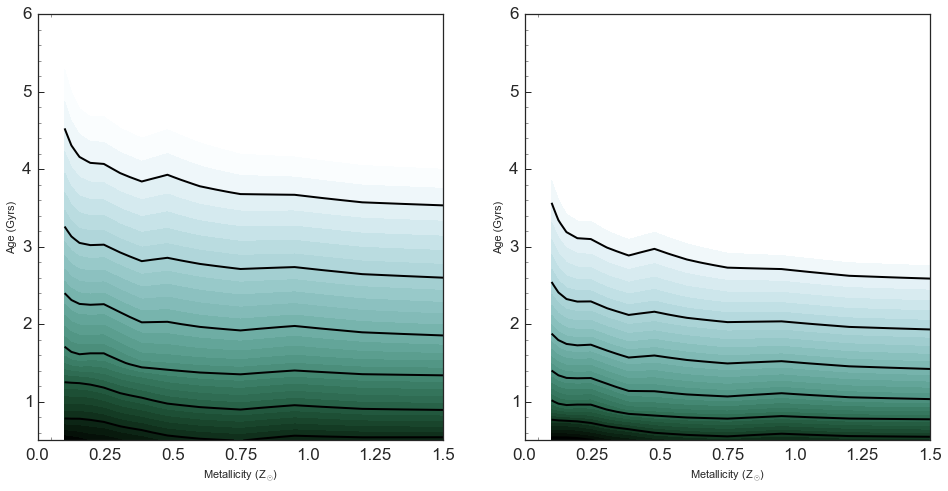

95.0845273269


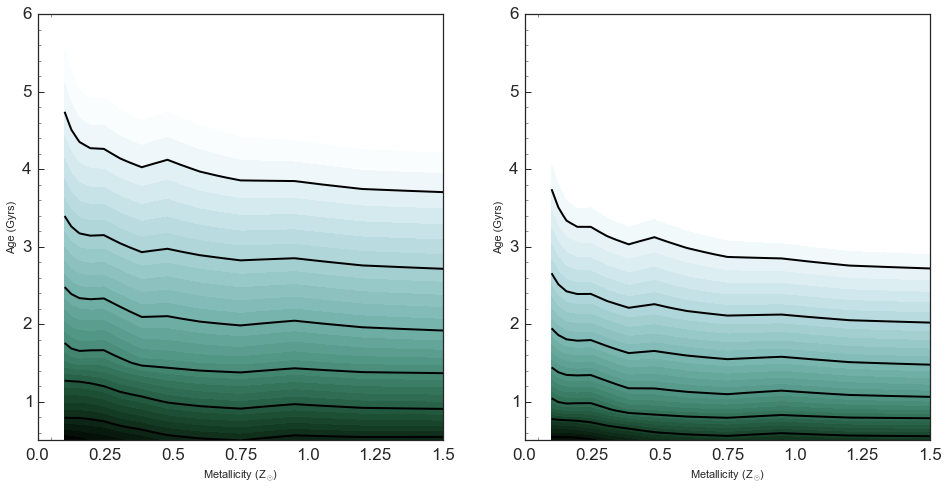

107.081569026


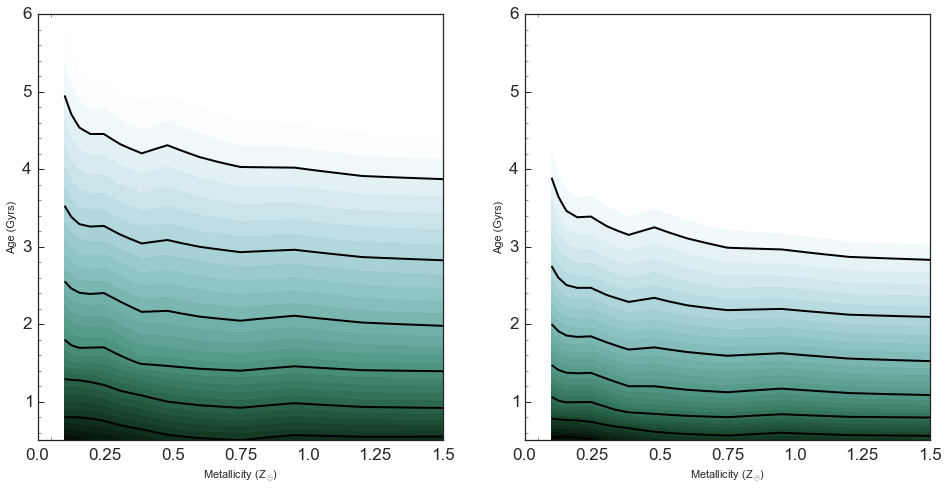

143.445126396


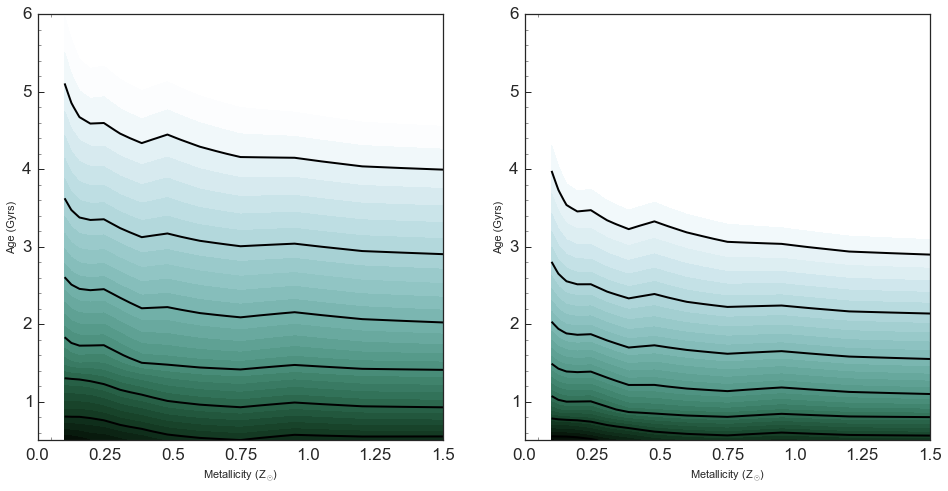

218.625168882


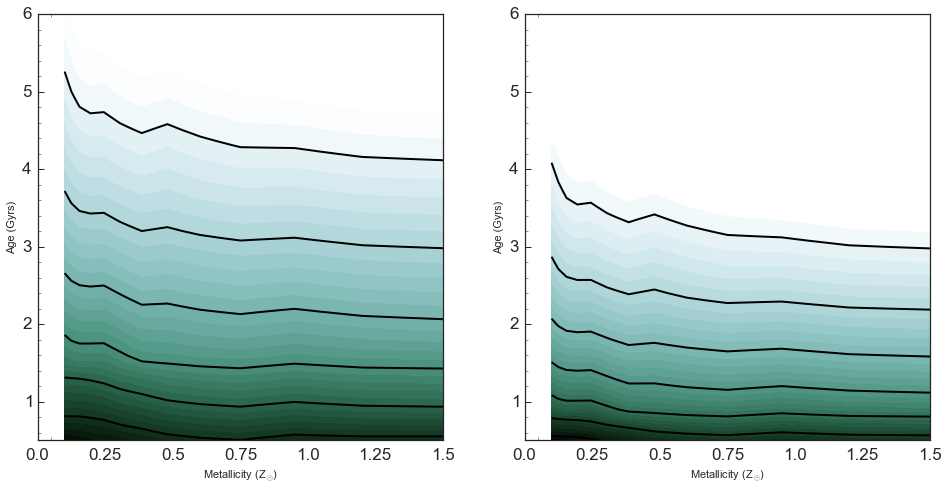

322.209514249


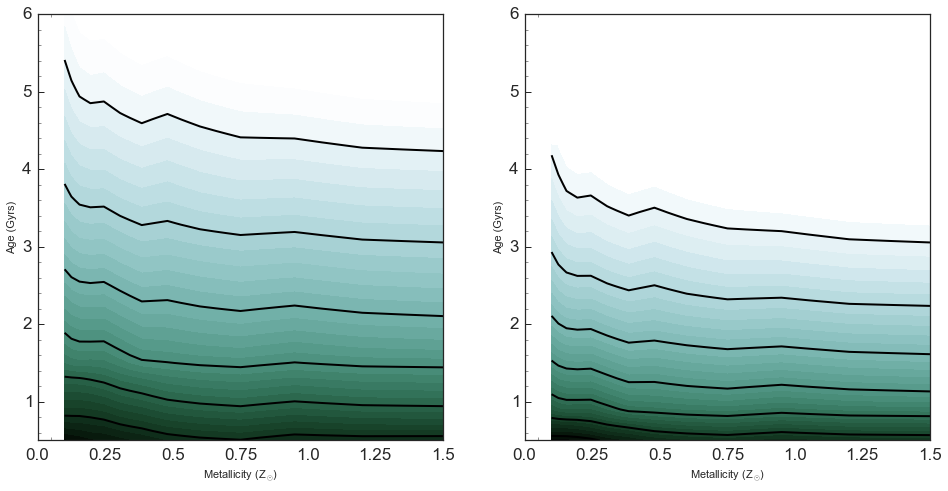

459.588166911


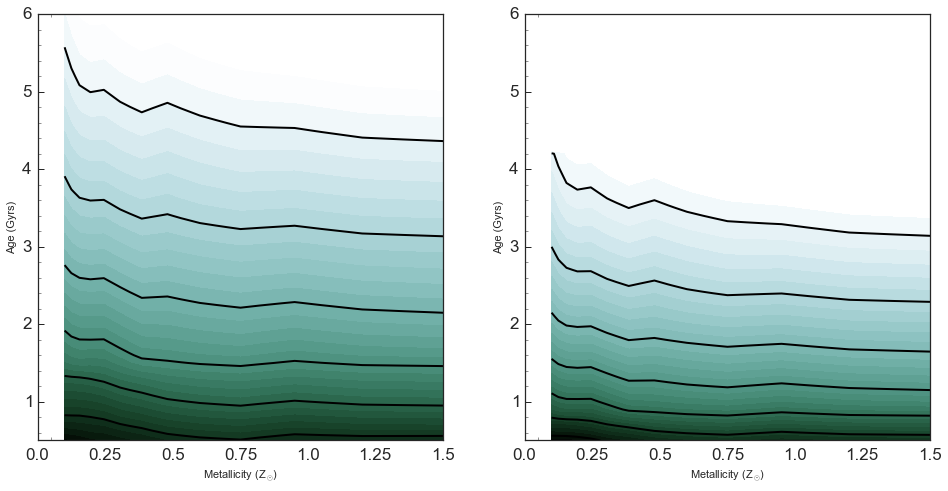

611.567777548


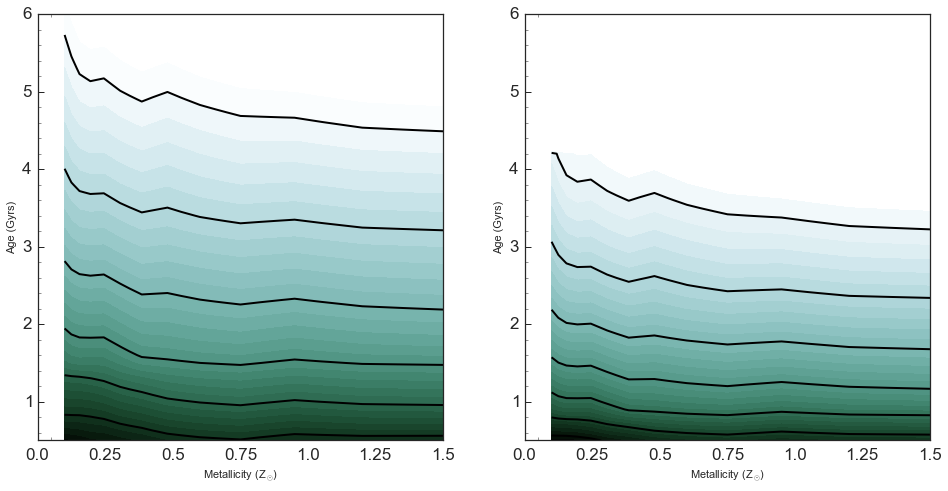

787.77009907


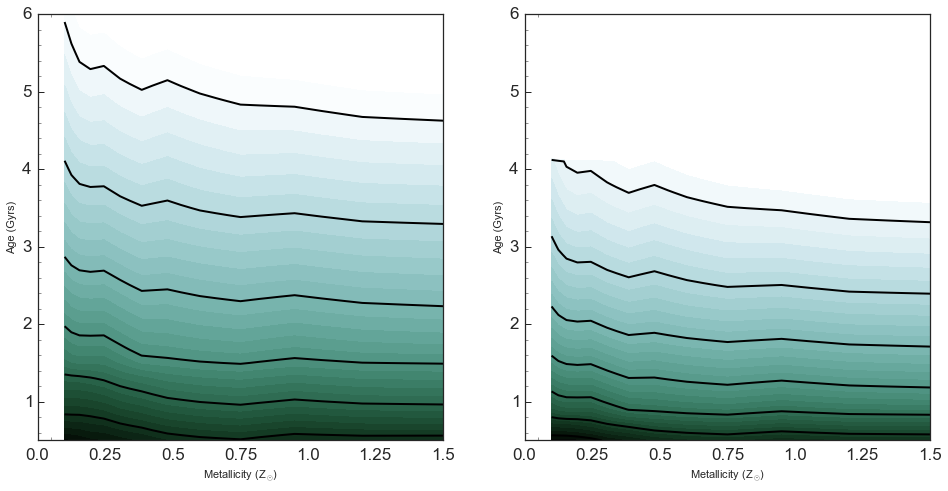

967.526611989


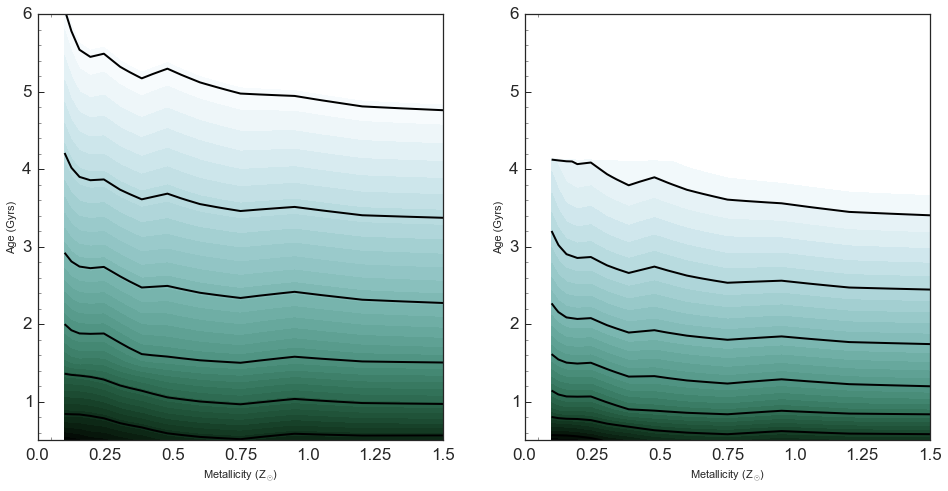

1065.53204692


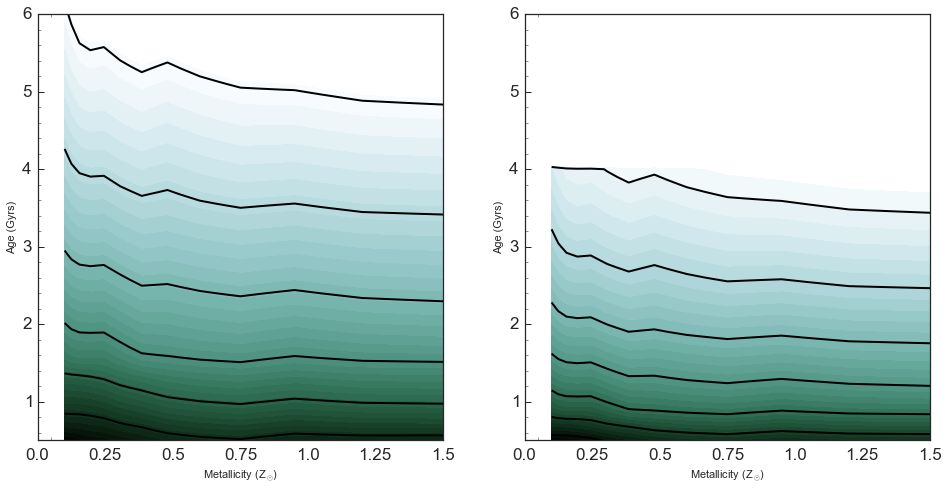

1259.13146741


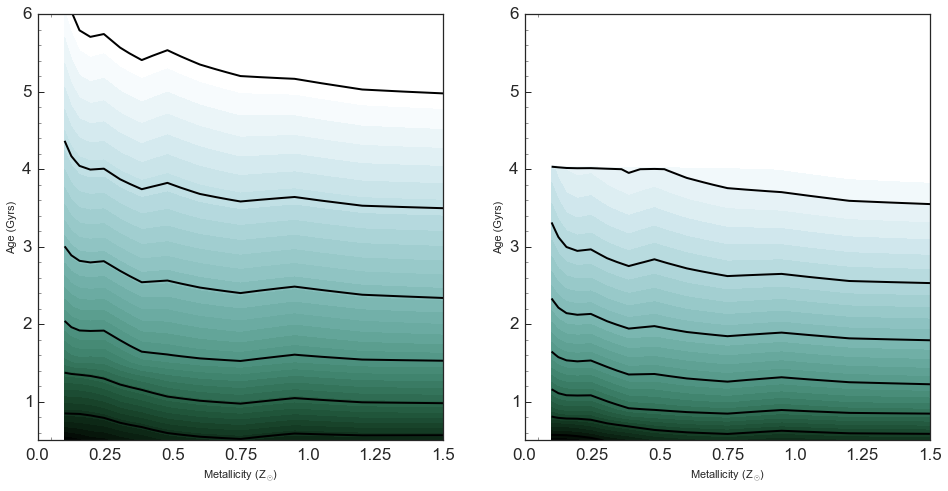

1462.77721896


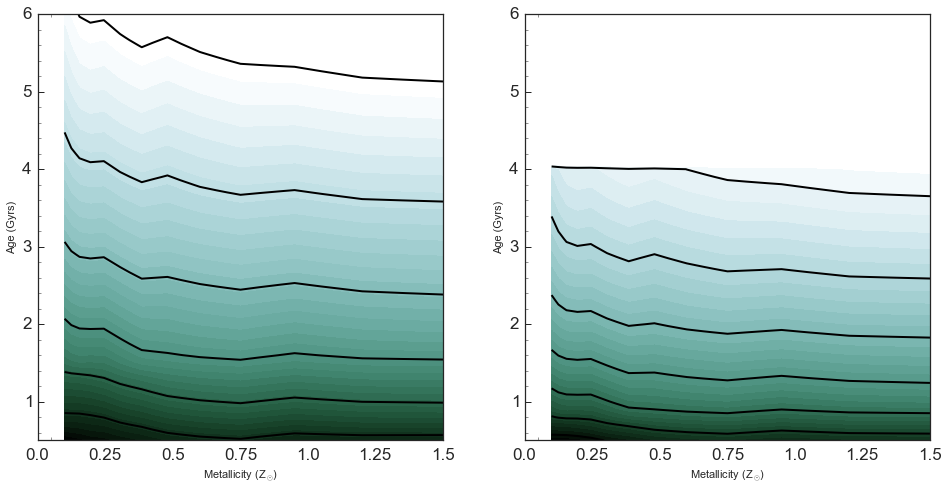

1554.05593624


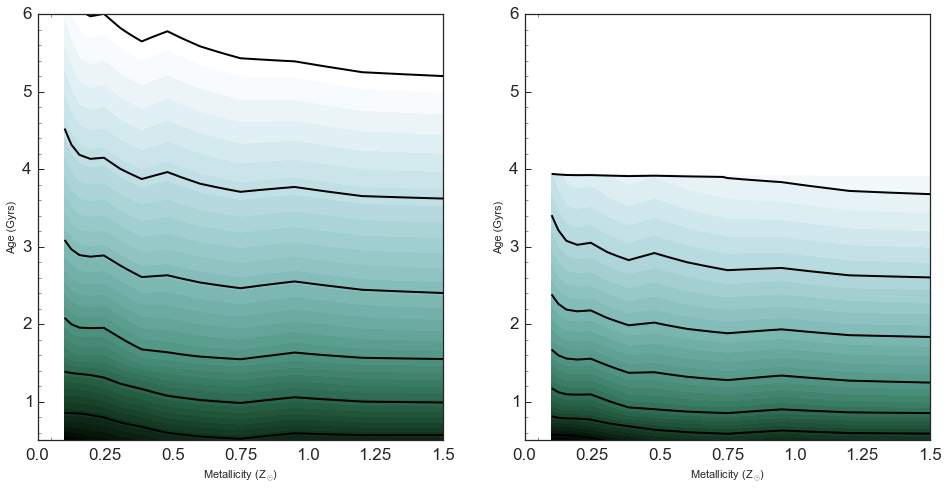

1759.52054761


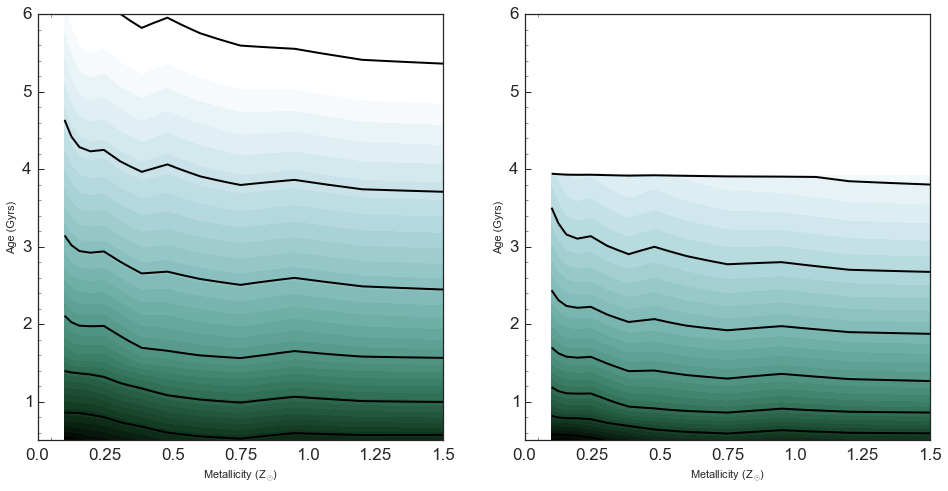

In [14]:
for i in range(len(chi)):
    
    print np.min(chi[i])
    
    plt.figure(figsize=[16,8])
    plt.subplot(1,2,1)
    plt.contour(M,A,chi[i],colors='k',linewidths=2)
    plt.contourf(M,A,chi[i],40,cmap=colmap)
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)')
    plt.ylabel('Age (Gyrs)')
    
    plt.subplot(1,2,2)
    plt.contour(M,A,newchi[i],colors='k',linewidths=2)
    plt.contourf(M,A,newchi[i],40,cmap=colmap)
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)')
    plt.ylabel('Age (Gyrs)')
    plt.show()
    plt.close()

0
[[40 17]]
[ 101.38597177  343.71208368]

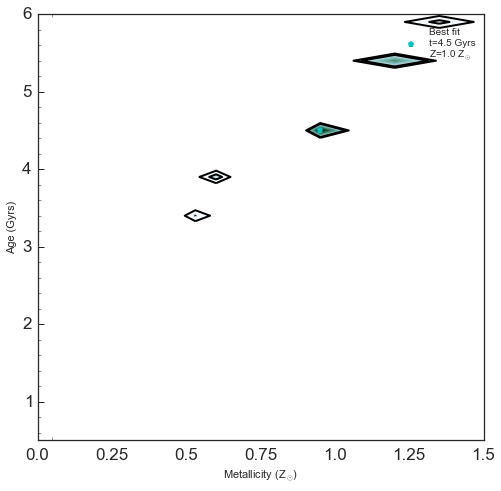

8.0
[[34 11]]
[  809.9419759   2353.22676408]

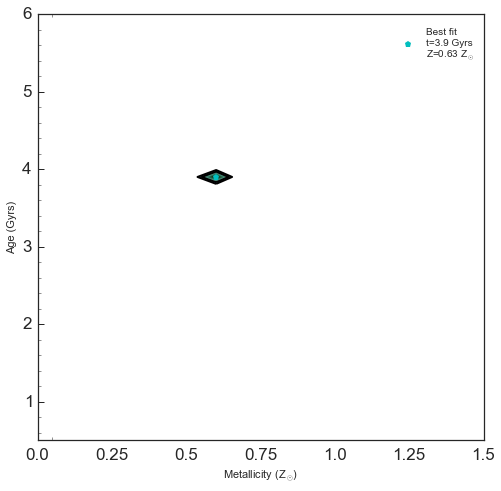

8.3
[[28  5]]
[  26.78203665  264.0541426 ]

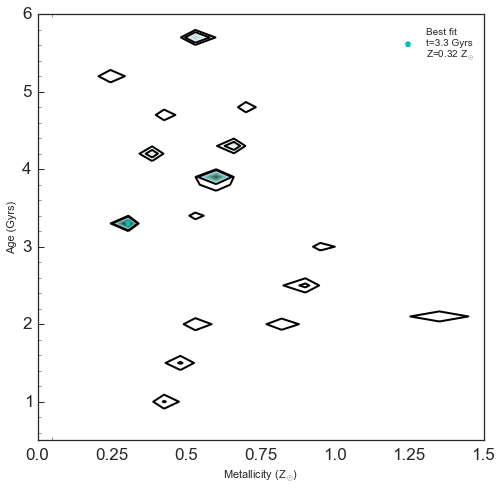

8.48
[[33 11]]


KeyboardInterrupt: 

In [4]:
%matplotlib inline

Pr=np.ones(prob[0].shape)

for i in range(len(prob)):
    
    print ntau[i]
    
    Age=[]
    for ii in range(len(prob[i])):
        Age.append(np.trapz(prob[i][ii],metal))
        
    Cp=np.trapz(Age,age)
    
    if Cp != 0:
        
        Pr=prob[i]/Cp
        
        x=np.argwhere(Pr==np.max(Pr))
    
        print x
        bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]
        
        onesig,twosig=Likelihood_contours(age,metal,Pr)
        levels=np.array([twosig,onesig])
        print levels    
    
        plt.figure(figsize=[8,8])
        plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
        plt.contourf(M,A,Pr,40,cmap=colmap)
        plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
        plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
        plt.tick_params(axis='both', which='major', labelsize=17)
        plt.gcf().subplots_adjust(bottom=0.16)
        plt.minorticks_on()
        plt.xlabel('Metallicity (Z$_\odot$)')
        plt.ylabel('Age (Gyrs)')
        plt.legend()
        plt.show()
        plt.close()

In [ ]:
%matplotlib inline

print prob.T.shape

ultau = np.append(0, np.power(10, np.array(tau)[1:] - 9))

print ultau

for i in range(len(tau)-1):
    Me = []
    for ii in range(len(metal)):
        Ag = []
        for iii in range(len(age)):
            Ag.append(np.trapz(prob.T[ii][iii][:i+2],ultau[:i+2]))
        Me.append(Ag)
    
    
    Me= np.array(Me)
        
    Age=[]
    for ii in range(len(Me.T)):
        Age.append(np.trapz(Me.T[ii],metal))
    #   
    Cp=np.trapz(Age,age)

    Pr=Me.T/Cp

    x=np.argwhere(Pr==np.max(Pr))

    print x
    bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]

    onesig,twosig=Likelihood_contours(age,metal,Pr)
    levels=np.array([twosig,onesig])
    print levels    

    plt.figure(figsize=[8,8])
    plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
    plt.contourf(M,A,Pr,40,cmap=colmap)
    plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
    plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.gcf().subplots_adjust(bottom=0.16)
    plt.minorticks_on()
    plt.xlabel('Metallicity (Z$_\odot$)')
    plt.ylabel('Age (Gyrs)')
    plt.legend()
    plt.show()
    plt.close()

NameError: name 'prob' is not defined

[ 0.    0.1   0.2   0.3   0.4   0.5   0.6   0.71  0.79  0.89  1.    1.1
  1.2   1.29  1.41  1.51  1.58  1.7   1.82  1.91  2.    2.09  2.19  2.29
  2.4   2.51  2.57  2.69  2.82  2.88  3.02]


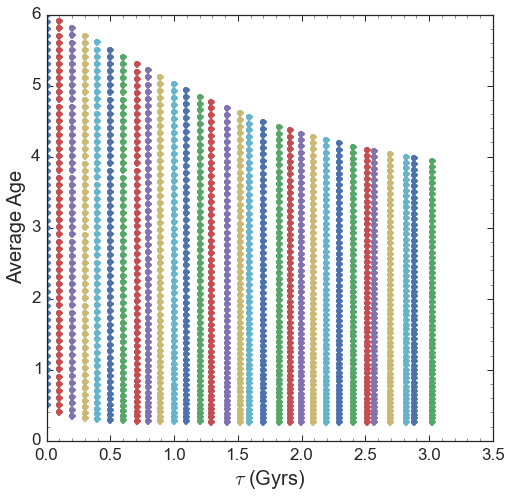

0.0  8.0    8.3    8.48   8.6    8.7   ...  9.41   9.43   9.45   9.46   9.48 
--- ------ ------ ------ ------ ------ ... ------ ------ ------ ------ ------
nan 0.4083 0.3499  0.321  0.306 0.2959 ... 0.2631 0.2627 0.2624 0.2622 0.2619
nan 0.5064 0.4366 0.3983 0.3776 0.3635 ... 0.3167 0.3161 0.3156 0.3154 0.3149
nan 0.6056  0.527 0.4794 0.4526 0.4339 ... 0.3709 0.3702 0.3695 0.3691 0.3685
nan 0.7052 0.6202 0.5639 0.5307 0.5071 ... 0.4257 0.4248 0.4239 0.4235 0.4226
nan  0.805 0.7154 0.6511 0.6116 0.5829 ... 0.4812   0.48 0.4789 0.4784 0.4773
nan  0.905 0.8121 0.7408 0.6951 0.6612 ... 0.5373 0.5359 0.5345 0.5338 0.5325
nan 1.0049 0.9099 0.8326  0.781 0.7417 ... 0.5941 0.5924 0.5907 0.5899 0.5883
nan 1.1049 1.0084  0.926 0.8688 0.8243 ... 0.6515 0.6494 0.6474 0.6465 0.6446
nan 1.2049 1.1074 1.0208 0.9585 0.9088 ... 0.7096 0.7071 0.7048 0.7037 0.7015
nan 1.3049 1.2067 1.1167 1.0497 0.9951 ... 0.7682 0.7654 0.7627 0.7614 0.7589
...    ...    ...    ...    ...    ... ...    ...    ...    ... 

In [71]:
%matplotlib inline

def Average_age(age,tau):
    t=np.append([0],np.array(age))
    if tau==0:
        sfh=np.ones(len(t))
    else:
        sfh = np.exp(-t / np.power(10, tau - 9))
    avgage=np.zeros(len(age))

    # bottom=np.trapz(sfh,t)
    for i in range(len(age)):
        top=np.trapz(t[0:i+2]*sfh[0:i+2],t[0:i+2])
        # print t[0:i+2]
        # avgage[i]=top/bottom
        avgage[i]=top
    return avgage

ultau=np.round(np.append(0,np.power(10, np.array(ntau)[1:] - 9)),2)

print ultau

age=np.arange(.5,6.1,.1)

a=np.linspace(0,6,601)

treshape=[]
plt.figure(figsize=[8,8])
plt.plot(np.repeat(0, len(age)), age, 'o')
for i in range(len(ntau)):
    perc = np.zeros(len(a) - 1)
    dage = np.zeros(len(a) - 1)
    avgage = np.zeros(len(a))
    sfh = np.exp(-a / np.power(10, ntau[i] - 9)) / np.power(10, ntau[i] - 9)
    for ii in range(len(a)-1):
        dage[0:ii+1]=dage[0:ii+1]+a[ii+1]-a[ii]
        perc[ii] = np.trapz(sfh[ii:ii + 2], a[ii:ii + 2])
        avgage[ii+1]=sum(dage*perc)/sum(perc)
    Avage=interp1d(a,avgage)(age)
    treshape.append(np.round(Avage,4))
    plt.plot(np.repeat(np.power(10, ntau[i] - 9), len(age)), Avage, 'o')
plt.tick_params(axis='both', which='major', labelsize=17)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
plt.xlabel('$\\tau$ (Gyrs)',size=20)
plt.ylabel('Average Age',size=20)
plt.show()
plt.close()

dat=Table(treshape,names=np.array(ntau).astype(str))

print dat
ascii.write(dat,'tau_scale_ntau.dat')

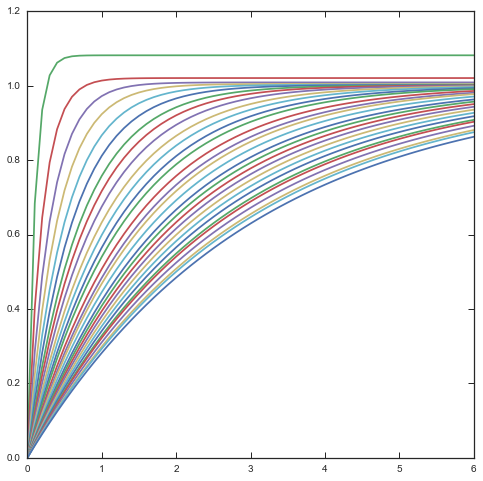

In [ ]:
%matplotlib inline

Age=np.arange(0,6.1,.1)

plt.figure(figsize=[8,8])
for i in range(len(ntau)):
    sfh = np.exp(-Age / np.power(10, ntau[i] - 9))/np.power(10, ntau[i] - 9)
    tmass=[]
    for ii in range(len(Age)):
        tmass.append(np.trapz(sfh[:ii+1],Age[:ii+1]))
        
    plt.plot(Age,tmass)
plt.show()
plt.close()

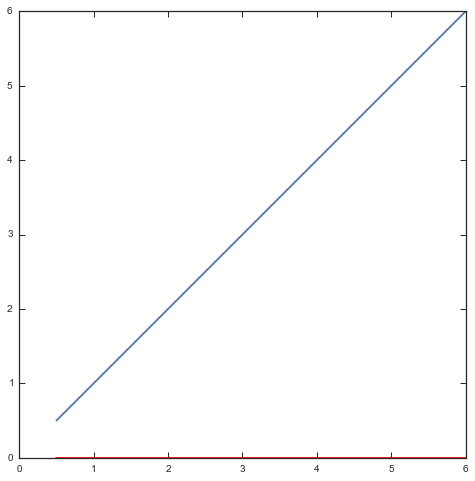

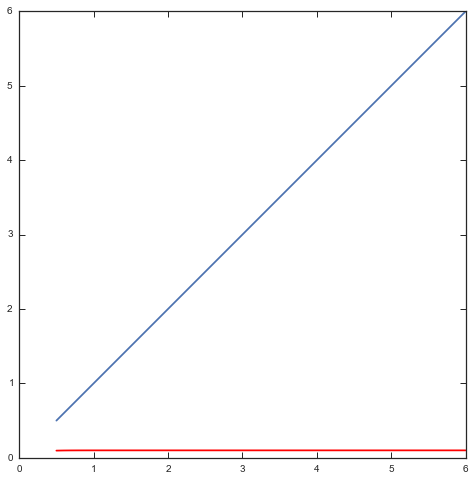

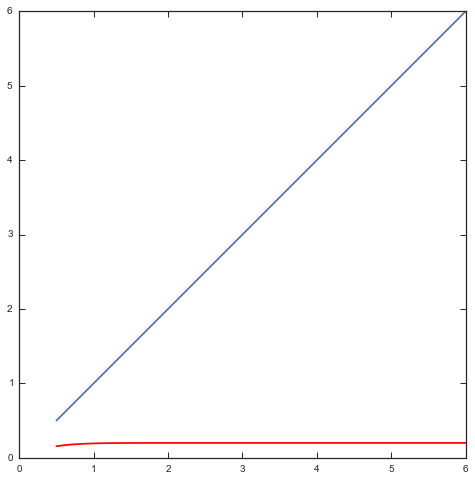

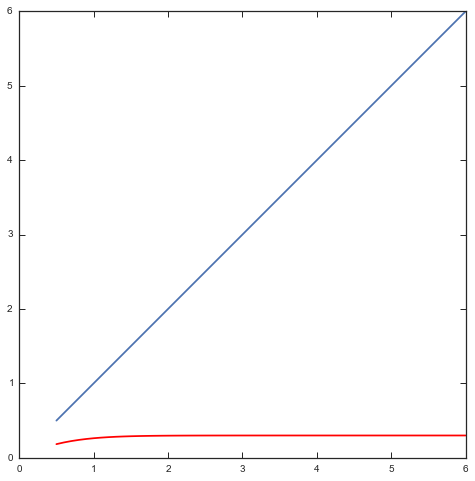

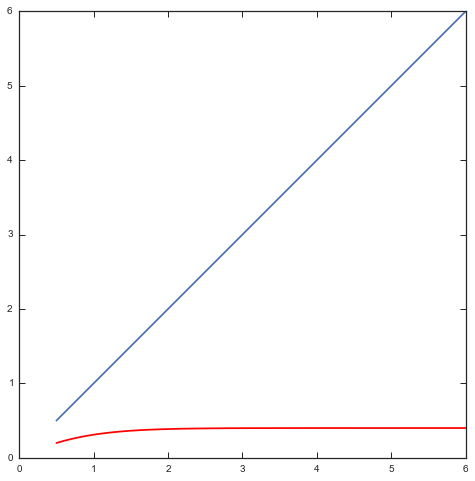

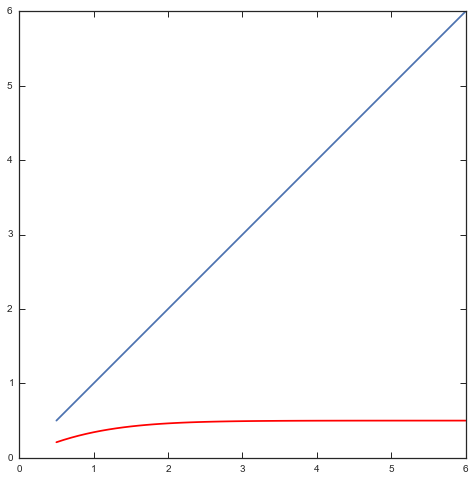

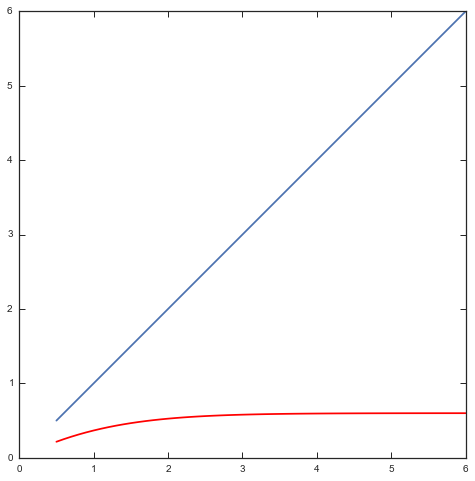

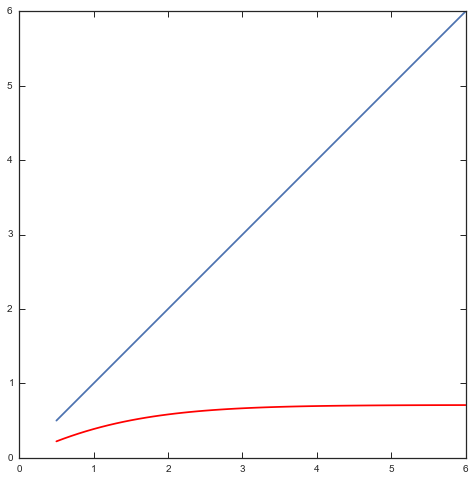

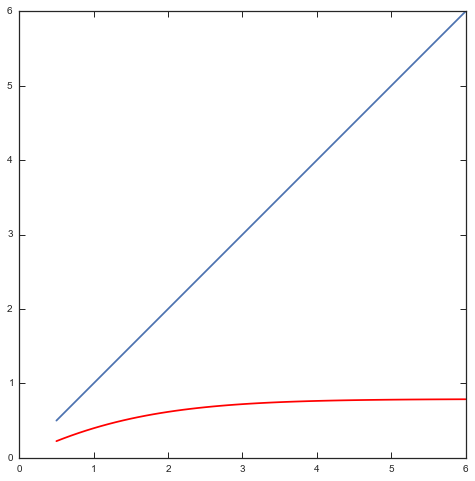

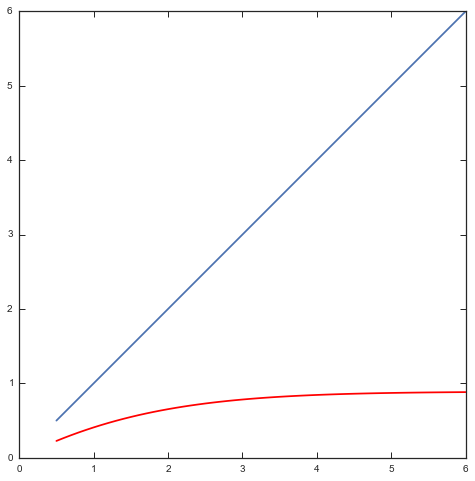

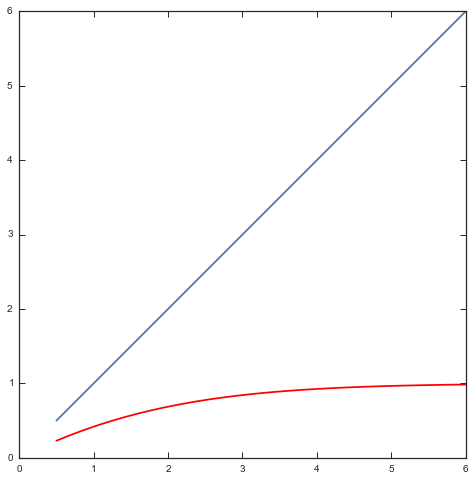

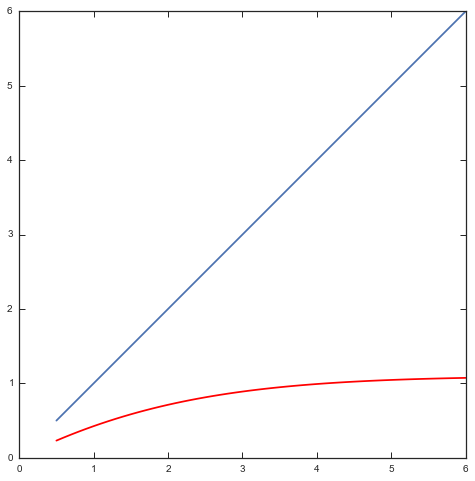

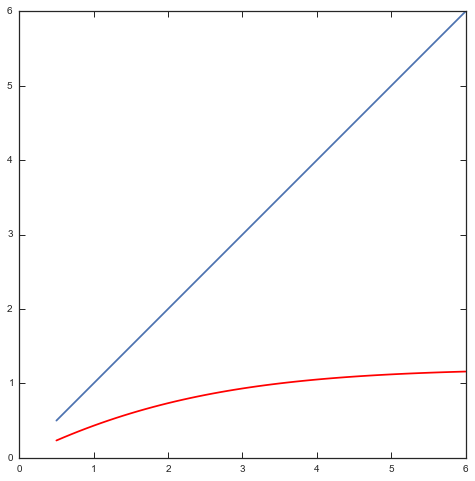

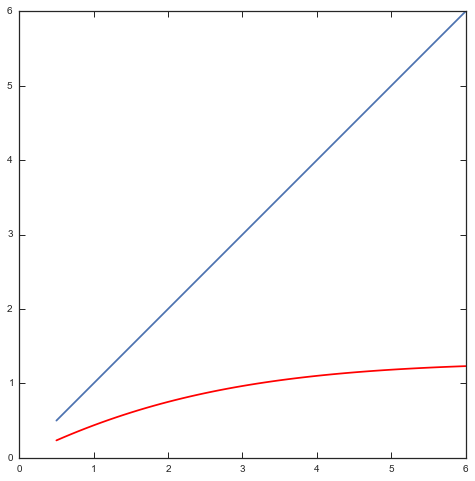

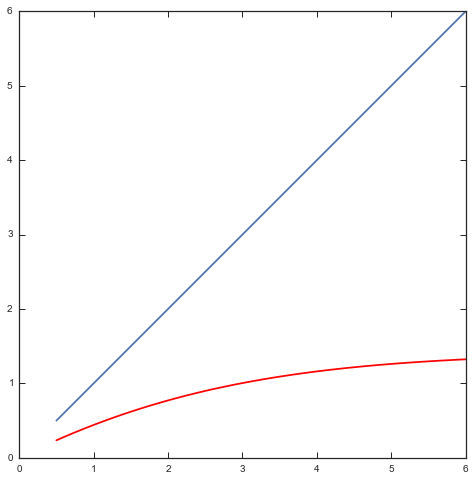

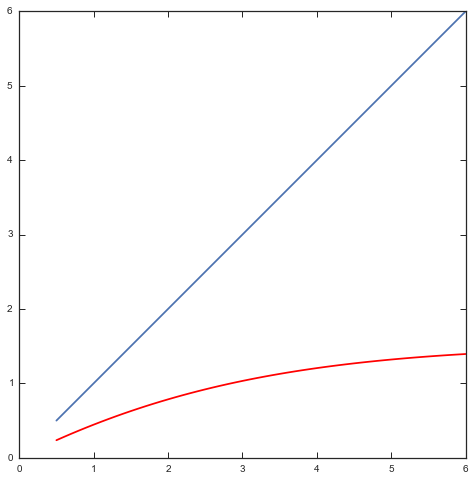

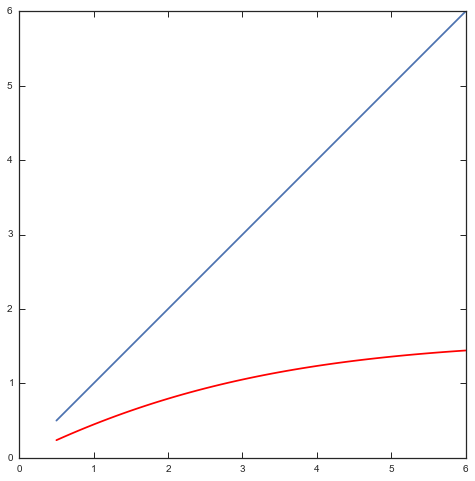

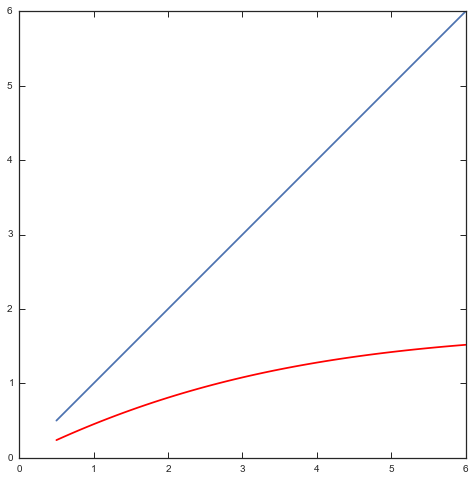

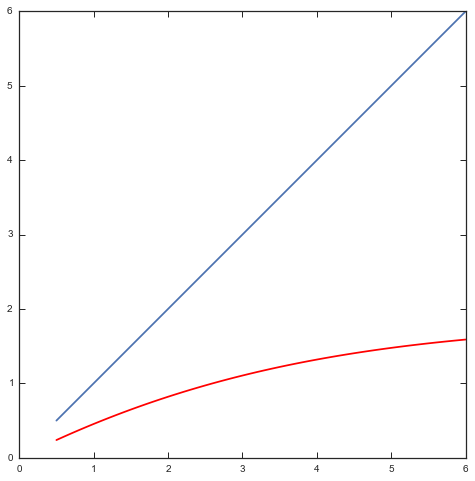

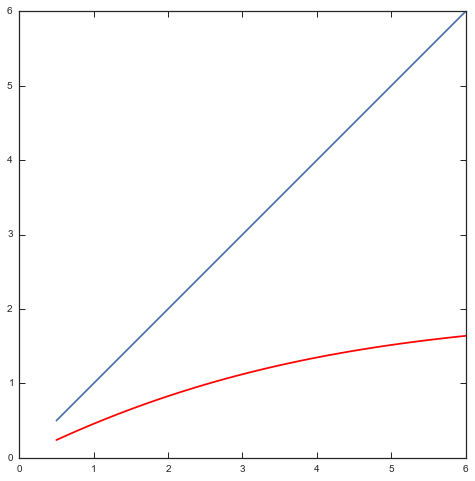

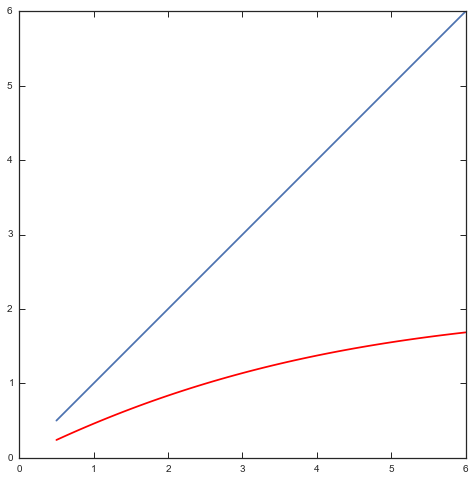

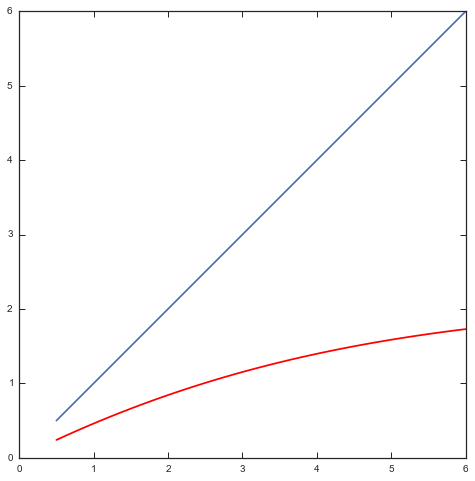

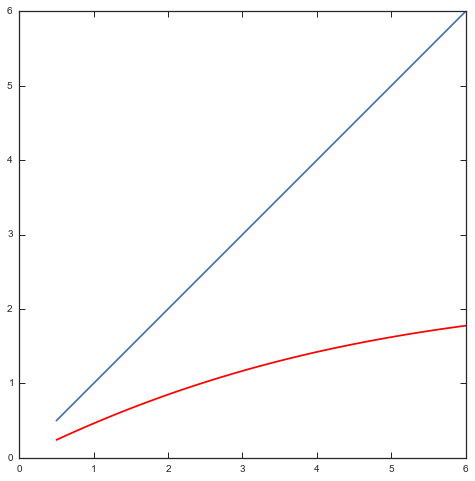

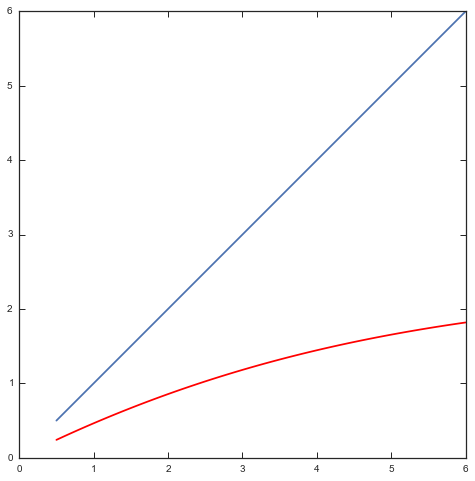

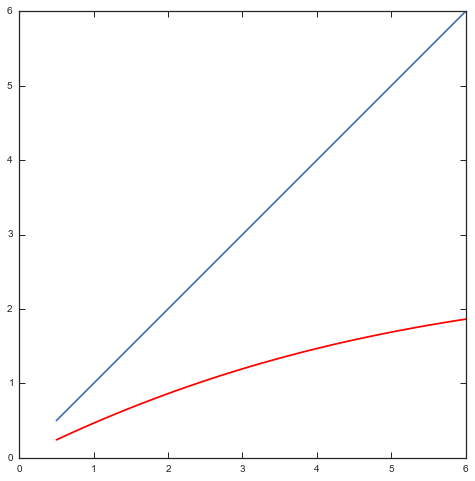

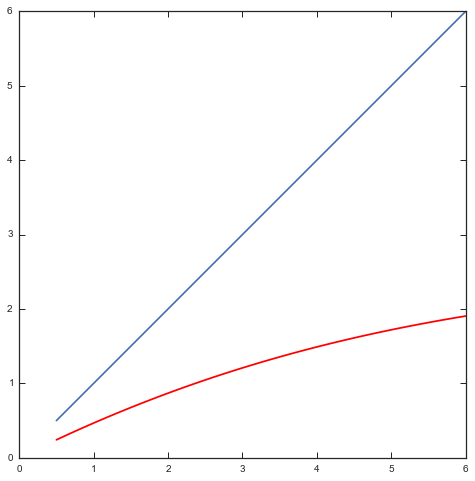

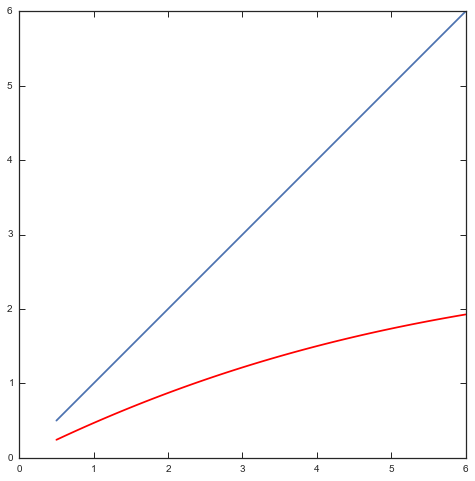

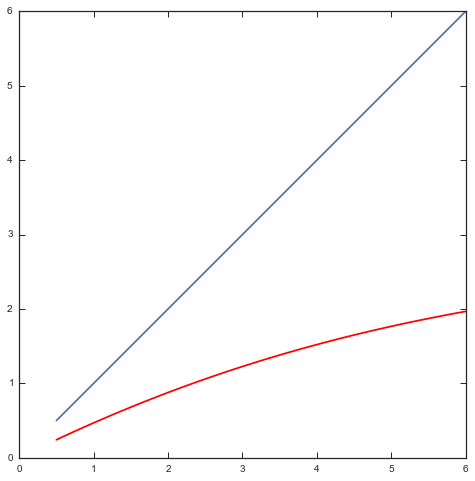

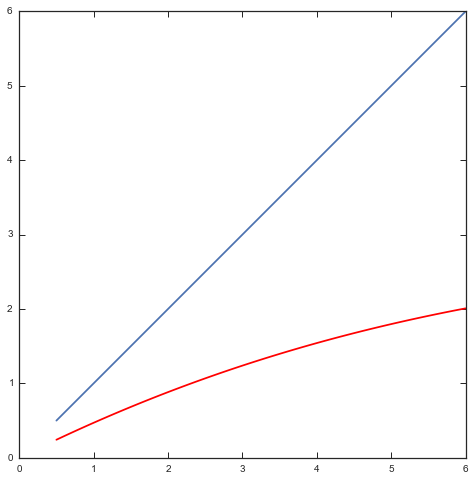

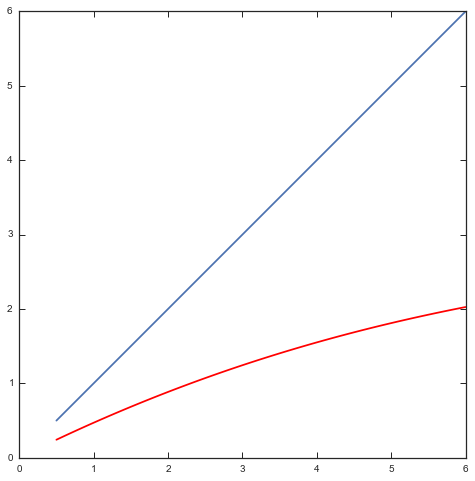

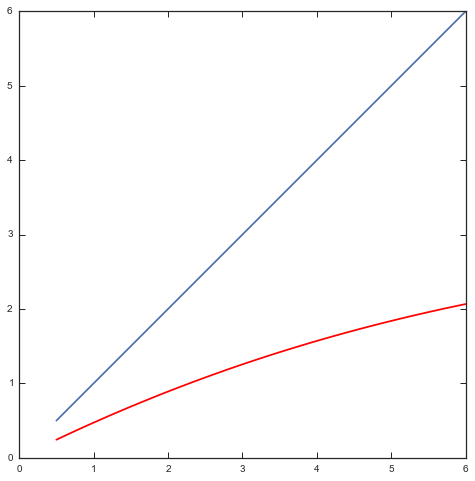

In [4]:
%matplotlib inline

def Avg_age(AGE,TAU):
    top=TAU-np.exp(-AGE/TAU)*(TAU + AGE)
    bottom=1-np.exp(-AGE/TAU)
    return top/bottom
ultau=np.round(np.append(0,np.power(10, np.array(ntau)[1:] - 9)),2)

for i in range(len(ultau)):
    avgage=Avg_age(age,ultau[i])
    plt.figure(figsize=[8,8])
    plt.plot(age,age)
    plt.plot(age,avgage,'r')
    plt.show()
    plt.close()